In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./sonar.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [6]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [7]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [11]:
X = df.drop(60,axis='columns')
y = df[60]
y = pd.get_dummies(y,drop_first=True)
y

,R
0,1
1,1
2,1
3,1
4,1
...,...
203,0
204,0
205,0
206,0


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.25)

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
model = keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.5641
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6624 - accuracy: 0.5897
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6667
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.6987
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.7051
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5685 - accuracy: 0.6923
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7628
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.7821
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.8141
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.8269
Epoch 11/

In [16]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 1s 0s/step - loss: 1.0734 - accuracy: 0.7692


[1.0734446048736572, 0.7692307829856873]

In [17]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

y_pred = np.round(y_pred)
print(y_pred[:10])

2/2 [==============================] - 0s 0s/step
[2.6791028e-10 9.9385828e-01 9.6271503e-01 3.9057377e-07 9.9998927e-01
 9.9989361e-01 6.0632408e-01 9.9999607e-01 1.3495890e-07 9.9999714e-01]
[0. 1. 1. 0. 1. 1. 1. 1. 0. 1.]


In [20]:
y_pred

array([0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0.], dtype=float32)

In [18]:
y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.78      0.72      0.75        25

    accuracy                           0.77        52
   macro avg       0.77      0.77      0.77        52
weighted avg       0.77      0.77      0.77        52



<AxesSubplot: >

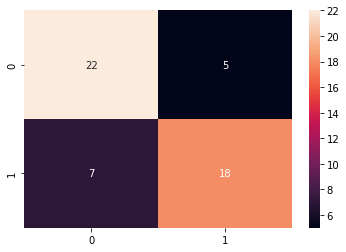

In [19]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [34]:
model = keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.6904 - accuracy: 0.5256
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6985 - accuracy: 0.4936
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6768 - accuracy: 0.5577
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.6090
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6750 - accuracy: 0.5769
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6547 - accuracy: 0.6346
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6647 - accuracy: 0.6090
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6288 - accuracy: 0.6667
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6301 - accuracy: 0.6731
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6105 - accuracy: 0.7051
Epoch 11/

In [35]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.4052 - accuracy: 0.7692


[0.4052339792251587, 0.7692307829856873]

2/2 [==============================] - 0s 7ms/step
[3.1957450e-05 8.6033309e-01 9.0516537e-01 2.8040761e-03 9.9999458e-01
 9.2730576e-01 4.7419015e-01 9.9999607e-01 1.0088960e-03 9.9999869e-01]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.78      0.72      0.75        25

    accuracy                           0.77        52
   macro avg       0.77      0.77      0.77        52
weighted avg       0.77      0.77      0.77        52



<AxesSubplot: >

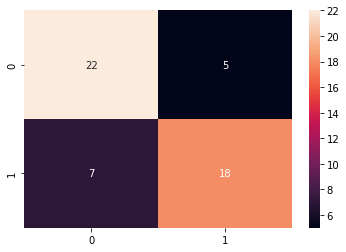

In [36]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

y_pred = np.round(y_pred)
print(y_pred[:10])
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)